In [ ]:
# !pip install -U datasets

In [5]:
from datasets import load_dataset

emotions = load_dataset("SetFit/emotion")

  0%|          | 0/3 [00:00<?, ?it/s]

### Dataset

In [6]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
})

In [7]:
emotions.column_names

{'train': ['text', 'label', 'label_text'],
 'validation': ['text', 'label', 'label_text'],
 'test': ['text', 'label', 'label_text']}

In [99]:
train_ds = emotions['train']
len(train_ds)

16000

In [11]:
train_ds[:3]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong'],
 'label': [0, 0, 3],
 'label_text': ['sadness', 'sadness', 'anger']}

In [12]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'label_text': Value(dtype='string', id=None)}

In [14]:
emotions.set_format('pandas')
df = emotions['train'][:]
df.head()

,text,label,label_text
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [18]:
def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label_text']
df.head()

,text,label,label_text,label_name
0,i didnt feel humiliated,0,sadness,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger,anger
3,i am ever feeling nostalgic about the fireplac...,2,love,love
4,i am feeling grouchy,3,anger,anger


In [19]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') # HD Plots

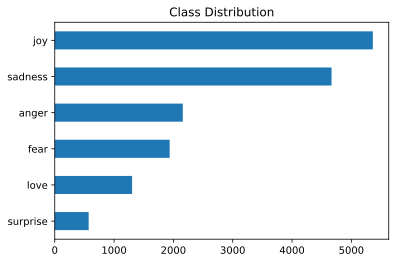

In [20]:
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Class Distribution')
plt.show()

#### PS: imbalanced DB

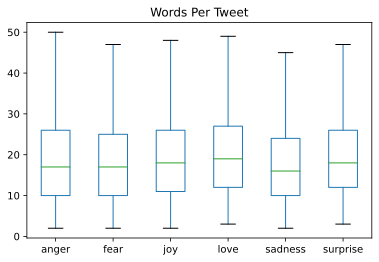

In [21]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot('Words Per Tweet', by='label_name', grid=False, showfliers=False)
plt.suptitle("")
plt.xlabel("")
plt.show()

#### Max Length: 50 Words // DistilBERT Limit => 512 tokens

In [22]:
emotions.reset_format()

### Tokenizing

In [23]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [24]:
encoded_text = tokenizer('Tokenizing text is a core task in NLP')
encoded_text

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1999, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [25]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
tokens

['[CLS]',
 'token',
 '##izing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'in',
 'nl',
 '##p',
 '[SEP]']

In [26]:
print(tokenizer.convert_ids_to_tokens(tokenizer('embed').input_ids))
print(tokenizer.convert_ids_to_tokens(tokenizer('embedded').input_ids))
print(tokenizer.convert_ids_to_tokens(tokenizer('embedding').input_ids))
print(tokenizer.convert_ids_to_tokens(tokenizer('embeds').input_ids))

['[CLS]', 'em', '##bed', '[SEP]']
['[CLS]', 'embedded', '[SEP]']
['[CLS]', 'em', '##bed', '##ding', '[SEP]']
['[CLS]', 'em', '##bed', '##s', '[SEP]']


In [27]:
words = tokenizer.convert_ids_to_tokens(tokenizer('embedding').input_ids)
print(words)
print(tokenizer.convert_tokens_to_string(words))

['[CLS]', 'em', '##bed', '##ding', '[SEP]']
[CLS] embedding [SEP]


In [28]:
print('The vocabulary size is:', tokenizer.vocab_size)

The vocabulary size is: 30522


In [29]:
print('Maximum context size:', tokenizer.model_max_length)

Maximum context size: 512


In [30]:
print('Name of the fields, model need in the forward pass:', tokenizer.model_input_names)

Name of the fields, model need in the forward pass: ['input_ids', 'attention_mask']


In [31]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [32]:
tokenize(emotions['train'][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [33]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [34]:
emotions_encoded['train'].column_names

['text', 'label', 'label_text', 'input_ids', 'attention_mask']

## Feature Extractor

In [35]:
import torch
import torch.nn as nn

Let's load the DistilBert Model now,

In [36]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [37]:
text = "this is a test"
sample_inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {sample_inputs['input_ids'].size()}\n"
      f"Tokenized text: {tokenizer.convert_ids_to_tokens(sample_inputs['input_ids'][0])}")

Input tensor shape: torch.Size([1, 6])
Tokenized text: ['[CLS]', 'this', 'is', 'a', 'test', '[SEP]']


In [38]:
inputs = {k:v.to(device) for k,v in sample_inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
    print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [39]:
outputs.last_hidden_state.shape

torch.Size([1, 6, 768])

In [40]:
outputs.last_hidden_state[:, 0].shape

torch.Size([1, 768])

In [41]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k, v in batch.items()
    if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state

    return {"hidden state": last_hidden_state[:, 0].cpu().numpy()}

In [42]:
emotions_encoded.set_format("torch", columns=['input_ids', 'attention_mask', 'label'])

In [43]:
print(type(emotions_encoded['train']['input_ids']))

<class 'torch.Tensor'>


In [44]:
emotions_hidden = emotions_encoded.map(
    extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [45]:
emotions_hidden["train"].column_names

['text', 'label', 'label_text', 'input_ids', 'attention_mask', 'hidden state']

In [46]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden state"])
X_valid = np.array(emotions_hidden["validation"]["hidden state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
print(X_train.shape, X_valid.shape)

(16000, 768) (2000, 768)


In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

pca = PCA(n_components=2)

x_scaled = MinMaxScaler().fit_transform(X_train)
x_2d = pca.fit_transform(x_scaled)
x_2d.shape

(16000, 2)

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(7, 5))
ax = ax.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"]["label_text"]
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    x_2d_sub = x_2d[y_train == i]
    ax[i].hexbin(x_2d_sub[:, 0], x_2d_sub[:, 1], cmap=cmap, gridsize=20, linewidths=(0,))
    ax[i].set_title(label)
    ax[i].set_axis_off()

plt.tight_layout()
plt.show()

In [54]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6335

### 63% Accuracy on Logistic Regression over Hidden Encodings

### Dummy Classifier

In [55]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent") # Predict the most frequent
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

In [124]:
labels = emotions["train"].unique("label_text")
# labels = emotions["train"].features["label_text"]

print(labels)

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']


In [86]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_pred, y_true, labels):
    cm = confusion_matrix(y_true, y_pred, normalize="true")
    _, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

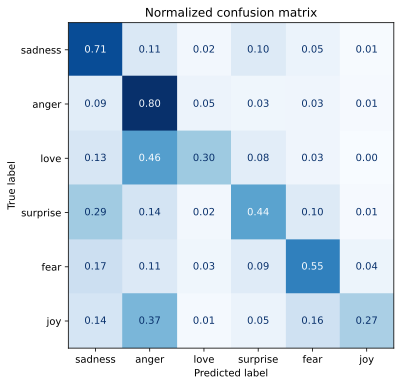

In [87]:
y_pred = lr_clf.predict(X_valid)
plot_confusion_matrix(y_pred, y_valid, labels)

### Decent Performance for Logistic Regression
Miscalculations at few points like love and joy

## FINETUNING

In [133]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification
        .from_pretrained(model_ckpt, num_labels=num_labels)
        .to(device))

In [134]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [135]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"

training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=3,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    log_level="error",
    report_to="none"
)

In [136]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded['train'],
    eval_dataset=emotions_encoded['validation'],
    tokenizer=tokenizer,
)

trainer.train()

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.816500,0.273122,0.915000,0.913838
2,0.210800,0.184931,0.926000,0.926188
3,0.147500,0.167392,0.934500,0.934629


TrainOutput(global_step=750, training_loss=0.3916048634847005, metrics={'train_runtime': 213.8603, 'train_samples_per_second': 224.446, 'train_steps_per_second': 3.507, 'total_flos': 1080514292544000.0, 'train_loss': 0.3916048634847005, 'epoch': 3.0})

In [137]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [138]:
preds_output.metrics

{'test_loss': 0.1673918068408966,
 'test_accuracy': 0.9345,
 'test_f1': 0.9346287590545421,
 'test_runtime': 2.6074,
 'test_samples_per_second': 767.059,
 'test_steps_per_second': 12.273}

### 91.38% Accuracy for 1 Epoch
### 92.61% Accuracy for 2 Epochs
### 93.46% Accuracy for 3 Epochs

In [140]:
y_preds = np.argmax(preds_output.predictions, axis=1)

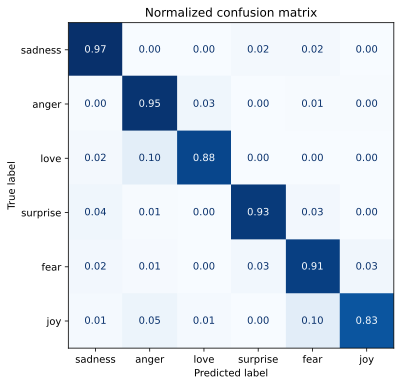

In [141]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [102]:
trainer.save_model('./FineTuned_DistilBERT_Emotions')

In [116]:
from torch.utils.data import DataLoader

test_loader = DataLoader(emotions_encoded['test'], batch_size=16)

## For the Base BERT Model

In [119]:
base_model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

In [120]:
import torch

base_model.eval()  # Set model to evaluation mode

all_predictions = []
all_labels = []

with torch.no_grad():  # Disable gradient computation
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = base_model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)

        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [121]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(all_labels, all_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.2045
Precision: 0.0905
Recall: 0.2045
F1 Score: 0.1251


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


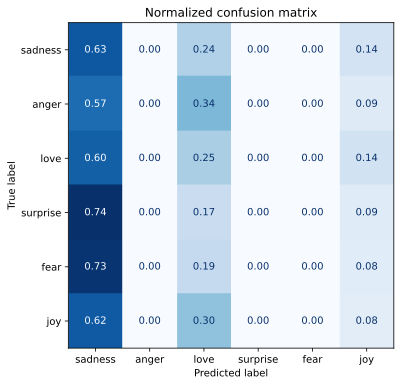

In [126]:
plot_confusion_matrix(all_predictions, all_labels, labels)


In [ ]:
Practically useless results